## Project TODO Steps
 1. create dataset
 2. create network
 3. train network
 4. test network

## Parameters to test
 1. sequence length
 2. amplitude
 3. frequency (period)
 4. offset
 5. phase
 6. noise
 
## Questions to answer
 1. What would a batch look like

In [2]:
import numpy as np
import pandas as pd
from random import random

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Masking
from keras.utils.np_utils import to_categorical


In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
BIGGEST_SIZE = 20
plt.rc('font', size=BIGGEST_SIZE)         # controls default text sizes
plt.rc('axes', titlesize=BIGGEST_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGEST_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

## Build a signal generator

In [4]:
def make_sig_gen(arr):
    """
    amplitude, period, phase, offset
    """
    def sig_gen(time):
        return arr[:, 3, None] + arr[:, 0, None] * np.cos(2.0 * np.pi * time[None, :] / arr[:, 1, None] - arr[:, 2, None])
    return sig_gen

In [5]:
# start off with simplest case for proof of concept
n_signals = 3
n_timesteps = 50

In [ ]:
timesteps = np.linspace(0, 200, n_timesteps)
coeffs = np.array([[1.0, 100.0, 0.0, 3.0],
                   [1.0, 100.0, 0.0, 0.0],
#                    [0.3, 90, 0.0, 1.5]
                  ])
n_signals = coeffs.shape[0]
siggen = make_sig_gen(coeffs)
sigs = siggen(timesteps)

In [8]:
categorical_labels = to_categorical(indices, num_classes=None)

NameError: name 'to_categorical' is not defined

In [ ]:
shuff = np.arange(n_timesteps)
np.random.shuffle(shuff)
indices = np.zeros(n_timesteps, dtype=int)

for s in range(n_signals):
    indices[np.where(shuff < s * n_timesteps//n_signals)] += 1

indices_tup = ((indices, np.arange(n_timesteps)))
one_hot = np.zeros(sigs.shape, dtype=int)
one_hot[indices_tup] = 1
mixed_sig = np.sum(one_hot * sigs, axis=0)

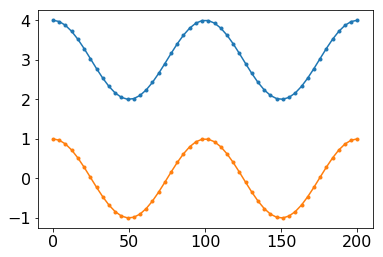

In [6]:
for i in range(n_signals):
    plt.plot(timesteps, sigs[i], marker='.')

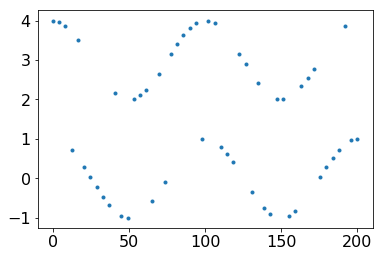

In [7]:
plt.scatter(timesteps, mixed_sig, marker='.')
# plt.plot(timesteps, mixed_sig, marker='.')

In [10]:
# generate a sequence of random values
def generate_sequence(n_timesteps):
    return [random() for _ in range(n_timesteps)]
 
# generate data for the lstm
def generate_data(n_timesteps):
    # generate sequence
    sequence = generate_sequence(n_timesteps)
    sequence = np.array(sequence)
    # create lag
    df = pd.DataFrame(sequence)
    df = pd.concat([df.shift(1), df], axis=1)
    # replace missing values with -1
    df.fillna(-1, inplace=True)
    values = df.values
    # specify input and output data
    X, y = values, values[:, 1]
    # reshape
    X = X.reshape(len(X), 2, 1)
    y = y.reshape(len(y), 1)
    return X, y


In [11]:
n_timesteps = 10
X, y = generate_data(n_timesteps)

In [ ]:
model = Sequential()
model.add(LSTM(2048, return_sequences=False,
               input_shape=self.input_shape,
               dropout=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(self.nb_classes, activation='softmax'))

In [187]:
n_timesteps = 10
# define model
model = Sequential()
model.add(LSTM(5, input_shape=(2, 1)))
# model.add(Masking(mask_value=-1, input_shape=(2, 1)))
# model.add(LSTM(5))
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))
# returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))  # return a single vector of dimension 32
# model.add(Dropout(0.5))
model.add(Dense(n_signals, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# model.compile(loss='mean_squared_error', optimizer='adam')

# fit model
for i in range(500):
    X, y = generate_data(n_timesteps, n_signals)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate model on new data
X, y = generate_data(n_timesteps)
yhat = model.predict(X)
for i in range(len(X)):
    print('Expected', y[i,0], 'Predicted', yhat[i,0])

Epoch 1/1
 - 2s - loss: 0.4023
Epoch 1/1
 - 0s - loss: 0.2985
Epoch 1/1
 - 0s - loss: 0.5378
Epoch 1/1
 - 0s - loss: 0.2096
Epoch 1/1
 - 0s - loss: 0.2658
Epoch 1/1
 - 0s - loss: 0.1617
Epoch 1/1
 - 0s - loss: 0.1767
Epoch 1/1
 - 0s - loss: 0.1772
Epoch 1/1
 - 0s - loss: 0.0838
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.1464
Epoch 1/1
 - 0s - loss: 0.2021
Epoch 1/1
 - 0s - loss: 0.0987
Epoch 1/1
 - 0s - loss: 0.1472
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.1243
Epoch 1/1
 - 0s - loss: 0.0749
Epoch 1/1
 - 0s - loss: 0.1019
Epoch 1/1
 - 0s - loss: 0.0665
Epoch 1/1
 - 0s - loss: 0.0495
Epoch 1/1
 - 0s - loss: 0.0410
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.0636
Epoch 1/1
 - 0s - loss: 0.0675
Epoch 1/1
 - 0s - loss: 0.0773
Epoch 1/1
 - 0s - loss: 0.0932
Epoch 1/1
 - 0s - loss: 0.1033
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0413
Epoch 1/1
 - 0s - loss: 0.0357
Epoch 1/1
 - 0s - loss: 0.0683
Epoch 1/

 - 0s - loss: 0.0018
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0081
Epoch 1/1
 - 0s - loss: 0.0072
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0012
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0022
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0013
Epoch 1/1
 - 0s - loss: 8.3835e-04
Epoch 1/1
 - 0s - loss: 0.0025
Epoch 1/1
 - 0s - loss: 8.6241e-04
Epoch 1/1
 - 0s - loss: 0.0015
Epoch 1/1
 - 0s - loss: 0.0023
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0014
Epoch 1/1
 - 0s - loss: 0.0014
Epoch 1/1
 - 0s - loss: 0.0024
Epoch 1/1
 - 0s - loss: 7.7893e-04
Epoch 1/1
 - 0s - loss: 0.0018
Epoch 

In [10]:
# generate a sequence of random values
def generate_sequence(n_timesteps):
    return [random() for _ in range(n_timesteps)]
 
# generate data for the lstm
def generate_data(n_timesteps):
    # generate sequence
    sequence = generate_sequence(n_timesteps)
    sequence = np.array(sequence)
    # create lag
    df = pd.DataFrame(sequence)
    df = pd.concat([df.shift(1), df], axis=1)
    # replace missing values with -1
    df.fillna(-1, inplace=True)
    values = df.values
    # specify input and output data
    X, y = values, values[:, 1]
    # reshape
    X = X.reshape(len(X), 2, 1)
    y = y.reshape(len(y), 1)
    return X, y


In [187]:
n_timesteps = 10
# define model
model = Sequential()
model.add(LSTM(5, input_shape=(2, 1)))
# model.add(Masking(mask_value=-1, input_shape=(2, 1)))
# model.add(LSTM(5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# fit model
for i in range(500):
    X, y = generate_data(n_timesteps)
    model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate model on new data
X, y = generate_data(n_timesteps)
yhat = model.predict(X)
for i in range(len(X)):
    print('Expected', y[i,0], 'Predicted', yhat[i,0])

Epoch 1/1
 - 2s - loss: 0.4023
Epoch 1/1
 - 0s - loss: 0.2985
Epoch 1/1
 - 0s - loss: 0.5378
Epoch 1/1
 - 0s - loss: 0.2096
Epoch 1/1
 - 0s - loss: 0.2658
Epoch 1/1
 - 0s - loss: 0.1617
Epoch 1/1
 - 0s - loss: 0.1767
Epoch 1/1
 - 0s - loss: 0.1772
Epoch 1/1
 - 0s - loss: 0.0838
Epoch 1/1
 - 0s - loss: 0.0968
Epoch 1/1
 - 0s - loss: 0.1464
Epoch 1/1
 - 0s - loss: 0.2021
Epoch 1/1
 - 0s - loss: 0.0987
Epoch 1/1
 - 0s - loss: 0.1472
Epoch 1/1
 - 0s - loss: 0.0681
Epoch 1/1
 - 0s - loss: 0.0907
Epoch 1/1
 - 0s - loss: 0.1243
Epoch 1/1
 - 0s - loss: 0.0749
Epoch 1/1
 - 0s - loss: 0.1019
Epoch 1/1
 - 0s - loss: 0.0665
Epoch 1/1
 - 0s - loss: 0.0495
Epoch 1/1
 - 0s - loss: 0.0410
Epoch 1/1
 - 0s - loss: 0.0688
Epoch 1/1
 - 0s - loss: 0.0636
Epoch 1/1
 - 0s - loss: 0.0675
Epoch 1/1
 - 0s - loss: 0.0773
Epoch 1/1
 - 0s - loss: 0.0932
Epoch 1/1
 - 0s - loss: 0.1033
Epoch 1/1
 - 0s - loss: 0.0670
Epoch 1/1
 - 0s - loss: 0.0413
Epoch 1/1
 - 0s - loss: 0.0357
Epoch 1/1
 - 0s - loss: 0.0683
Epoch 1/

 - 0s - loss: 0.0018
Epoch 1/1
 - 0s - loss: 0.0039
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0026
Epoch 1/1
 - 0s - loss: 0.0028
Epoch 1/1
 - 0s - loss: 0.0081
Epoch 1/1
 - 0s - loss: 0.0072
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0020
Epoch 1/1
 - 0s - loss: 0.0050
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0043
Epoch 1/1
 - 0s - loss: 0.0012
Epoch 1/1
 - 0s - loss: 0.0038
Epoch 1/1
 - 0s - loss: 0.0033
Epoch 1/1
 - 0s - loss: 0.0022
Epoch 1/1
 - 0s - loss: 0.0040
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0030
Epoch 1/1
 - 0s - loss: 0.0032
Epoch 1/1
 - 0s - loss: 0.0013
Epoch 1/1
 - 0s - loss: 8.3835e-04
Epoch 1/1
 - 0s - loss: 0.0025
Epoch 1/1
 - 0s - loss: 8.6241e-04
Epoch 1/1
 - 0s - loss: 0.0015
Epoch 1/1
 - 0s - loss: 0.0023
Epoch 1/1
 - 0s - loss: 0.0027
Epoch 1/1
 - 0s - loss: 0.0014
Epoch 1/1
 - 0s - loss: 0.0014
Epoch 1/1
 - 0s - loss: 0.0024
Epoch 1/1
 - 0s - loss: 7.7893e-04
Epoch 1/1
 - 0s - loss: 0.0018
Epoch 

In [188]:
data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps, data_dim)))
# returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=5,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 2s 2ms/step - loss: 11.4755 - acc: 0.0940 - val_loss: 11.6669 - val_acc: 0.1300
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 11.4734 - acc: 0.0950 - val_loss: 11.6683 - val_acc: 0.1200
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 11.4735 - acc: 0.0900 - val_loss: 11.6683 - val_acc: 0.1100
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 11.4727 - acc: 0.1040 - val_loss: 11.6695 - val_acc: 0.0800
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 11.4728 - acc: 0.1010 - val_loss: 11.6700 - val_acc: 0.0600
